## COM-480 | Project of Data Visualization

Team: "no preference"

Member: Ulysse Widmer, Jack Lau, Luis Busta

Topic: Player engagement with respect to game genres on Steam public data

## Dataset

#### Dataset on Kaggle
* [Steam video games](https://www.kaggle.com/datasets/tamber/steam-video-games)
* [Steam store games](https://www.kaggle.com/datasets/nikdavis/steam-store-games)
* [Steam player data](https://www.kaggle.com/datasets/jackogozaly/steam-player-data)
* [Steam games complete dataset](https://www.kaggle.com/datasets/trolukovich/steam-games-complete-dataset)
* [Steam dataset](https://www.kaggle.com/datasets/souyama/steam-dataset)
* [Historical player count](https://data.mendeley.com/datasets/ycy3sy3vj2/1)
#### Web api
* [Steam web api from valve](https://developer.valvesoftware.com/wiki/Steam_Web_API) | 
[(It is not possible to get historical data for steam web api)](https://stackoverflow.com/questions/45983820/steam-api-get-historical-player-count-of-specific-game)

### Anlysis on Steam web api

In [115]:
# import all the library needed
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from datetime import datetime

sns.set_style("whitegrid")

# all game list => http://api.steampowered.com/ISteamApps/GetAppList/v2
# current player list => http://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/?appid={}
# get global stats for game => http://api.steampowered.com/ISteamUserStats/GetGlobalStatsForGame/v0001/?appid={}
#! We can't get historical data from steam web api, but we can get the current player of different genre

games = requests.get("https://steamspy.com/api.php?request=all")

In [ ]:
df = {
    "game_id":[],
    "genres":[],
    "players":[]
}

count = 0

for game in games.json()['applist']['apps']:
    name = str(game["appid"])
    ppl = requests.get("http://api.steampowered.com/ISteamUserStats/GetNumberOfCurrentPlayers/v1/?appid=" + name).json()['response'] \
        .get('player_count', 0)
    genre = requests.get("http://store.steampowered.com/api/appdetails?appids=" + name).json()
    genre = 0 if genre is None else genre.get(name, dict()).get('data', dict()).get('genres', 0)
    
    if ppl and genre:
        df['game_id'].append(name)
        df['genres'].append(genre[0]['description'])
        df['players'].append(ppl)
        count += 1
        if count == 10:             # number of games to scrap
            break

df = pd.DataFrame(df)
df.to_csv("player_with_category"+ datetime.strftime(datetime.now(), "%m%d%Y" ) +".csv")
df.head()

#### Visualization

In [99]:
print(df)
df = pd.DataFrame(df)

{'game_id': ['1748230', '1748300', '1748390', '1747670', '1747690', '1747830', '1747890', '1748050', '1747650', '1747050', '1745690', '1742470', '1741400', '1740730', '1740930', '1740000', '1740070', '1740150', '1739530', '1739880', '1739970', '1736260', '1736400', '1736450', '1735950', '1735160', '1735300', '1734280', '1734320', '1734390', '1733620', '1733880'], 'genres': ['Adventure', 'Casual', 'Action', 'Casual', 'Adventure', 'Action', 'Adventure', 'Casual', 'Action', 'Adventure', 'Free to Play', 'Casual', 'Indie', 'Action', 'Action', 'Action', 'Indie', 'Action', 'Adventure', 'Action', 'Adventure', 'Casual', 'Casual', 'Simulation', 'Adventure', 'Action', 'Utilities', 'Casual', 'Action', 'RPG', 'Action', 'Action'], 'players': [1, 6, 4, 1, 1, 1, 1, 1, 9, 8, 1, 2, 21, 1, 6, 1, 2, 2, 1, 1, 3, 1, 1, 3, 11, 1, 1, 1, 28, 3, 2, 3]}


In [100]:
plot_df = df.copy()
plot_df = plot_df.groupby(['genres']).sum().sort_values('players', ascending=False)
plot_df

,players
genres,
Action,59
Adventure,26
Indie,23
Casual,13
RPG,3
Simulation,3
Free to Play,1
Utilities,1


<AxesSubplot:xlabel='players', ylabel='genres'>

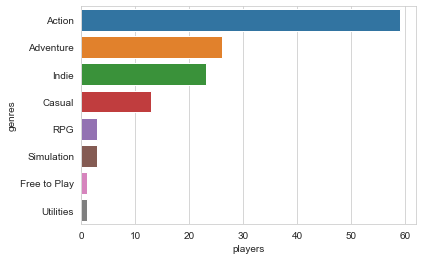

In [101]:
sns.barplot(x=plot_df.players , y=plot_df.index, errorbar=None)

### Anlysis on Historical player count

In [9]:
# import all the library needed
%matplotlib widget

from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

DIR = "./data/"

In [218]:
# Import the dataframe
date = pd.read_csv(DIR + "/PlayerCOuntHistoryPart1/10.csv", index_col=0).index
genres = pd.read_csv(DIR + "applicationGenres.csv", header=None, names=[str(i) for i in range(9)])
games = os.listdir(DIR + "PlayerCountHistoryPart1")

# Get all the avaiable genres
genres.loc[genres["3"] == "60", "3"] = np.NaN
genres_set = set()
for i in range(1,4):
    genres_set.update(genres[str(i)].unique())
genres_set.remove(np.NaN)

his_count = pd.DataFrame(0, index=(i for i in range(len(date))), columns=genres_set)

In [219]:
genres.head()

,0,1,2,3,4,5,6,7,8
0,578080,Action,Adventure,Massively Multiplayer,NaN,NaN,NaN,NaN,NaN
1,570,Action,Free to Play,Strategy,NaN,NaN,NaN,NaN,NaN
2,730,Action,Free to Play,NaN,NaN,NaN,NaN,NaN,NaN
3,622590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,359550,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Create a new data set with categories as feature and time as index
for index, row in genres.iterrows():
    fileName = (str(row[0]) + ".csv")
    if row[1] != np.NaN and fileName in games:
        temp = pd.read_csv(DIR + "PlayerCountHistoryPart1/" + fileName)
        for i in range(1,9):
            if type(row[i]) != str:
                break
            his_count[row[i]] += (temp["Playercount"])
            
his_count.index = date
his_count.to_csv(DIR + "playercount.csv")

#### Visualization

In [50]:
df = pd.read_csv(DIR + 'playercount.csv')
df.head()

,Time,Free to Play,Early Access,Action,Nudity,Sexual Content,Utilities,Software Training,Strategy,Video Production,...,Violent,Web Publishing,Sports,Audio Production,Gore,Simulation,Casual,Adventure,RPG,Racing
0,2017-12-14 00:00,850156.0,27591.0,1604627.0,178.0,35.0,9138.0,0,591409.0,1668.0,...,232.0,777.0,71369.0,0,646.0,273836.0,74915.0,684439.0,402742.0,49495.0
1,2017-12-14 00:05,838598.0,27498.0,1580691.0,168.0,31.0,9338.0,0,584431.0,1637.0,...,225.0,784.0,70436.0,0,636.0,271327.0,74405.0,673980.0,398928.0,48907.0
2,2017-12-14 00:10,823617.0,27505.0,1557621.0,149.0,29.0,9680.0,0,578182.0,1636.0,...,211.0,791.0,69094.0,0,613.0,270007.0,74125.0,667923.0,395785.0,47895.0
3,2017-12-14 00:15,812254.0,27374.0,1541895.0,142.0,34.0,10031.0,0,572168.0,1650.0,...,199.0,797.0,68292.0,0,597.0,268553.0,74038.0,665123.0,392397.0,47330.0
4,2017-12-14 00:20,801986.0,27356.0,1530248.0,117.0,33.0,10422.0,0,565574.0,1644.0,...,176.0,803.0,67611.0,0,553.0,267360.0,73793.0,666219.0,389305.0,46925.0


interactive(children=(IntSlider(value=0, description='w', max=280223), Output()), _dom_classes=('widget-intera…

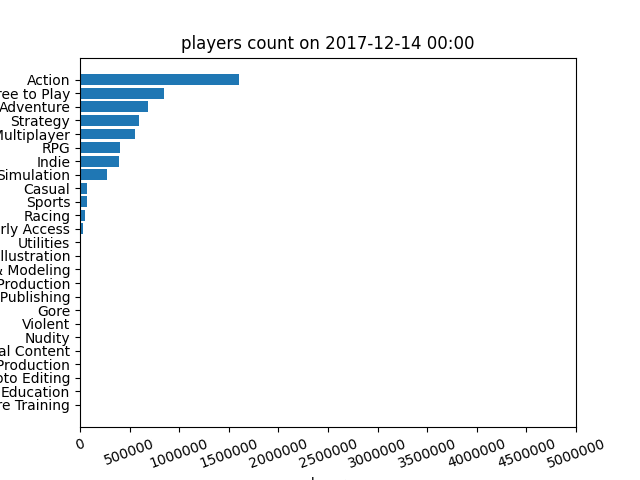

In [110]:
# Plot the bar graph

def generateSortedList(date):
    temp = list(zip(df.columns[1:], (df.iloc[ date , 1:].tolist())))
    return np.array(sorted(temp, key=lambda x:x[1]))
    
fig = plt.figure()
data = generateSortedList(df.index[0])
ax = fig.add_subplot(1, 1, 1)
rects = ax.barh( data[:,0] , data[:,1] )
plt.xlim([0, 2000000])
plt.xticks([i for i in range(0,5000001, 500000)], labels=[str(i) for i in range(0,5000001, 500000)], rotation=20)
plt.xlabel("players")
plt.ylabel("genres")

def update(w = 0):
    plt.title("players count on " + df.loc[ w ,"Time"])
    tempdata = generateSortedList(w)
    counter = 0
    for rect in rects:
        rect.set_width(float(tempdata[:, 1][counter]))
        counter += 1
    fig.canvas.draw_idle()

interact(update, w=(0,len(df.index)-1));